<a href="https://colab.research.google.com/github/yoohyunseok/Machine-Learnig-Deep-Learning/blob/main/feature_engineering_regulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중 회귀


*   여러 개의 특성을 사용한 선형 회귀
*   특성이 하나일 땐 1차원, 특성이 2개일 땐 2차원 평면, 3개일 땐 3차원 ...쭉쭉 늘어나는겨
*   특성이 2개인 경우
    - 특성 2개가 타깃 값과 함께 3차원 공간을 형성하고 선형 회귀 방정식 [타깃 = a x 특성1 + b x 특성2 + c(절편)]이 평면을 이룬다
*  보통 특성이 많을 수록 선형 회귀는 강력해진다



In [62]:
import pandas as pd
df = pd.read_csv("https://bit.ly/perch_csv_data") #read_csv()로 csv 파일을 pandas의 dataframe으로 가져오기
#csv 파일은 , 로 나누어져 있는 텍스트 파일이다.
perch_full = df.to_numpy() #dataframe을 numpy 배열로 변환
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [63]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]) #target 데이터 준비

In [64]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

# 특성 공학(feature engineering)


*   기존의 특성을 이용해서 새로운 특성을 뽑아내는 작업
*   이 예제에서는 농어의 길이, 높이, 두께, 길이 x 높이를 사용할 예정
*   "길이 x 높이"가 특성 공학으로 만들어낸 새로운 특성이다!
*   transformer
    * sklearn에서 제공하는 특성을 만들거나 전처리 하기 위한 다양한 클래스


In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
poly = PolynomialFeatures() #polynomialFeatures 클래스 알아보기
poly.fit([[2,3]]) #fit()은 새롭게 만들 특성 조합을 찾는다.
#이때 타깃 데이터는 필요하지 않다. 입력 데이터만 넣어주면 됨
print(poly.transform([[2,3]])) #transform()은 실제로 데이터를 fit()을 토대로 변환한다.

[[1. 2. 3. 4. 6. 9.]]


**polynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성 끼리 서로 곱한 항을 추가한다.**

**그러면 1은 왜 추가되었지??**

**선형 방정식: 무게 = a x 길이 + b x 높이 + c x 두께 + d x 1**

**선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고도 볼 수 있다.**

**하지만 사이킷 런의 선형 모델은 자동으로 절편을 추가하기 때문에 굳이 이렇게 특성을 만들 필요는 없다**

In [67]:
poly = PolynomialFeatures(include_bias = False) #여기선 명시적으로 include_bias = False를 썼지만, 사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시한다.
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [68]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [69]:
poly.get_feature_names_out()
#'x0'는 첫 번째 feature
#'x0^2는 첫 번째 feature의 제곱
#'x0 x1은 첫 번째 feature와 두 번째 feature의 곱

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [70]:
test_poly = poly.transform(test_input)

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [72]:
print(lr.score(test_poly, test_target)) #과소 적합 해결

0.9714559911594111


**특성의 개수가 많을수록 선형 회귀 모델이 강력해지니깐 특성의 개수를 더 늘려볼까?**

In [73]:
poly = PolynomialFeatures(degree = 5, include_bias = False) #degree 매개 변수로 고차항의 최대 차수를 5로 지정
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape) #특성이 55개나 생겼어

(42, 55)


In [74]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [75]:
print(lr.score(test_poly, test_target))#?????

-144.40579436844948


**과대적합 발생**

# 과대 적합에 대응하는 법

# 규제


*   머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것(훈련 세트에 모델이 과대 적합되는 것을 방지)
*   선형 회귀 모델에서는 특성에 곱해지는 계수의 크기를 작게하는 것을 의미한다.



In [76]:
# 규제를 적용 할 때도 계수 값의 크기가 서로 비슷해야한다.
# 규제 이전에 정규화를 먼저 해야함
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly) #꼭 훈련 세트로 학습 한 tranformer로 테스트 세트까지 변환해야함

# 릿지 회귀
*  계수를 제곱 한 값을 기준으로 규제를 적용
*  선형 모델의 계수를 작게 만들어 과대 적합을 방지
*  alpha 값이 커질 수록 규제의 강도가 강해짐(기본 값은 1)

In [77]:
from sklearn.linear_model import Ridge #릿지 모델 임포트
ridge = Ridge() #릿지 객체 생성
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [78]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


**적절한 alpha 값 찾기**





In [79]:
#훈련 세트와 테스트 세트의 점수가 가장 가까운 지점의 alpha 값
# alpha 값에 대한 R^2(결정 계수)값의 그래프 그려보기
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [80]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] #110씩 곱한 alpha 값
for alpha in alpha_list: #alpha 값에 대한 훈련 세트, 테스트 세트의 점수 구하기
    ridge = Ridge(alpha = alpha)

    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

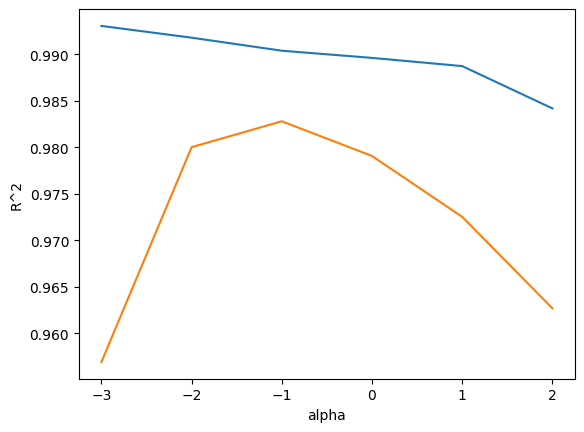

In [81]:
plt.plot(np.log10(alpha_list), train_score)#alpha 값의 간격을 동일하게 나타내기 위해 np.log10() 사용
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() #적절한 alpha값은 0.1

In [82]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


# 라쏘 회귀
*   계수의 절댓 값을 기준으로 규제를 적용
*   릿지와 마찬가지로 규제가 있는 선형 회귀 모델
*   릿지와 달리 계수 값을 아예 0으로 만들 수도 있음
*   유용한 feature를 골라내는 용도로도 사용할 수 있음

In [83]:
from sklearn.linear_model import Lasso
lasso = Ridge()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9896101671037343


In [84]:
print(lasso.score(test_scaled, test_target))

0.9790693977615387


In [85]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha)

    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

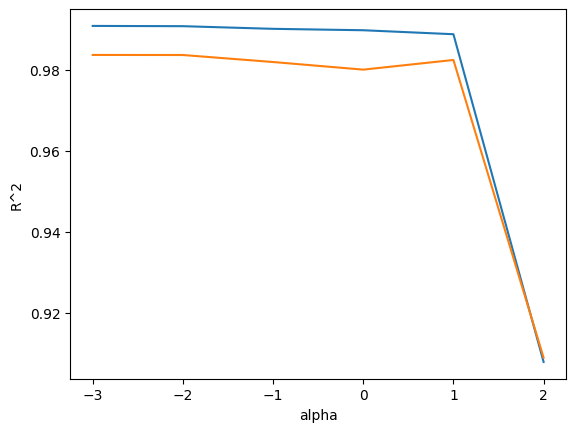

In [86]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() #적절한 alpha 값은 10

In [87]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [88]:
print(np.sum(lasso.coef_ == 0)) #lasso 모델의 계수는 coef_ 속성에 저장되어있다
# np.sum()을 이용해 계수가 0이 된 feature 개수 알아보기(True를 1 False를 0이라고 인식하여 비교 연산자에 맞는 원소 개수 카운트 가능)
# lasso 모델은 계수를 0으로 만들 수 있기 때문에 유용한 feature를 골라내는 용도로도 사용할 수 있다.

40


**위의 alpha 값 같이 모델이 학습하지 않고 사람이 사전에 지정해줘야 하는 파라미터를 [하이퍼파라미터]라고 한다. 이놈을 조정하여 모델의 정확도를 올리는 방법도 있음**

ridge에 solver 매개변수에 auto, sag(확률적 평균 경사하강법), saga 같은거랑  lasso에 max_iter는 더 찾아보고 필기...